<a href="https://colab.research.google.com/github/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis/blob/main/experiments/unetCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

In [1]:
# IMPORT AND MOUNT DRIVE
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# CLONE GITHUB REPOSITORY
!rm -r "COVID-Chest-X-Rays-Deep-Learning-analysis"
!git clone https://github.com/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis.git

rm: cannot remove 'COVID-Chest-X-Rays-Deep-Learning-analysis': No such file or directory
Cloning into 'COVID-Chest-X-Rays-Deep-Learning-analysis'...
remote: Enumerating objects: 1004, done.
remote: Counting objects: 100% (415/415), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 1004 (delta 257), reused 203 (delta 87), pack-reused 589
Receiving objects: 100% (1004/1004), 105.06 MiB | 26.27 MiB/s, done.
Resolving deltas: 100% (520/520), done.


In [3]:
# LOAD DIRECTORIES
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/models')
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/tools')

In [4]:
# LOAD TRAINING DATA

from XRaysDataset import XRaysDataset

dataset = XRaysDataset(batch_size=64)
train_datasets, training_size = dataset.load(separate_classes=False)

Dataset size  3443
Number of batches for the dataset: 54


# Training

In [5]:
#LOAD MODEL
from unetCGAN import unetCGAN

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/unetCGAN'
out_images_path = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/unetCGAN/outImages'


unetCGAN = unetCGAN(batch_size=64,
                    n_epochs=250,
                    checkpoint_dir=checkpoint_dir,
                    out_images_path=out_images_path,
                    use_residual=True)

# noise used during training in order to evaluate how the network is learning
benchmark_noise = np.random.randn(unetCGAN.latent_size * unetCGAN.batch_size)
# reshape into a batch of inputs for the network
benchmark_noise = benchmark_noise.reshape(unetCGAN.batch_size, unetCGAN.latent_size )
# generate labels
benchmark_labels = np.random.randint(0, 3, unetCGAN.batch_size)

#train model
unetCGAN.train_model(train_datasets, benchmark_noise, benchmark_labels)

# Results

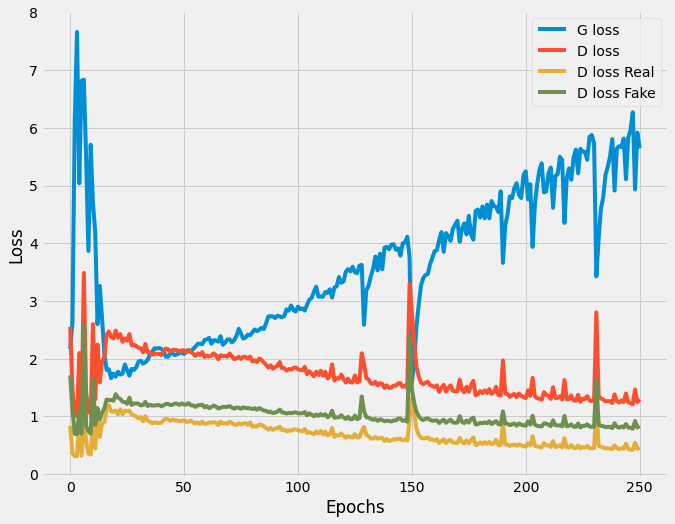

In [7]:
with plt.style.context('fivethirtyeight'):
  unetCGAN.plot_losses(unetCGAN.history, "Epochs", "Loss")

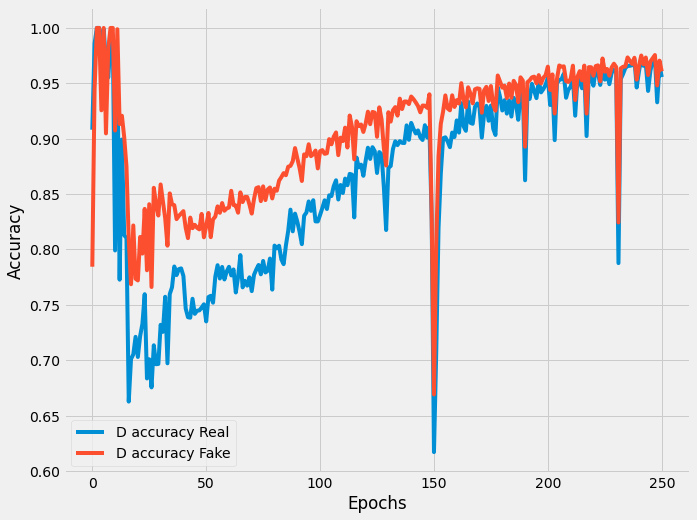

In [8]:
with plt.style.context('fivethirtyeight'):
  unetCGAN.plot_losses(unetCGAN.accuracy, "Epochs", "Accuracy")

In [9]:
from images_to_gif import images_to_gif

images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/unetCGAN/outImages/generated_at_*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/unetCGAN/outImages/unetCGAN_gen.gif')

images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/unetCGAN/outImages/decoded_at_*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/unetCGAN/outImages/unetCGAN_dec.gif')